In [1]:
import requests as rq
from bs4 import BeautifulSoup as bs
from pprint import pprint as pp
import matplotlib.pyplot as plt

# Final Function

Name       : Surat
Address    : Surat, Gujarat, India
Latitude   : 21.1702401
Longitude  : 72.83106070000001



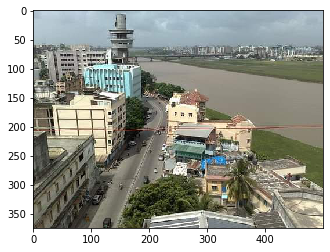

In [3]:
def get_info(place):
    url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
    params = {'input': f'{place}',
          'inputtype': 'textquery',
          'fields': 'place_id,photos,formatted_address,name,rating,opening_hours,geometry',
          'key': 'YOUR API KEY',
          'photoreference':'CmRaAAAAK9eay-SzysPwoyqs2MC113XeQmdMvxXXaJSND8TwSbhwRFUgN5x5E4hkvtJTQ75uPWQQ8IgqGu9N5-78T8Vms5M_O2xk_CyWnXm3eSg-1tDeSINvfTvDuDkVkqgsphf9EhAyoyHyOnG0qqm8TQOrOCOfGhTNnECx7B_1RUv16V3qDuv9MnfxKw'
         }
    photo_url = "https://maps.googleapis.com/maps/api/place/photo?maxwidth=640&maxheight=480&photoreference={}&key=YOUR API KEY"
    
    info_response = rq.get(url,params=params)
    if info_response.headers['Content-type']=='application/json; charset=UTF-8':
        info = info_response.json()
        #print(info)
        if info['status']=='OK':
            data =  'Name'.ljust(10)      + ' : ' + info['candidates'][0]['name'] +'\n'
            data += 'Address'.ljust(10)   +' : ' + info['candidates'][0]['formatted_address'] + '\n'
            data += 'Latitude'.ljust(10)  +' : ' + str(info['candidates'][0]['geometry']['location']['lat']) + '\n'
            data += 'Longitude'.ljust(10) +' : ' + str(info['candidates'][0]['geometry']['location']['lng']) + '\n'
            
            img_ref = info['candidates'][0]['photos'][0]['photo_reference']
            img_response = rq.get(photo_url.format(img_ref))
            if img_response.headers['Content-type'] == 'image/jpeg':
                with open('api_image.jpeg','wb') as fp:
                    fp.write(img_response.content)
                    fp.close
                img = plt.imread('api_image.jpeg')
                return data,img
    
            else:
                return data,[]
            
        else:
            return 'Data Not Found !',[]
    
    else:
        return 'Data Not Found !',[]
    
#MAIN_PROGRAM 
data,img = get_info('surat')
if len(img):
    print(data)
    plt.imshow(img)
else:
    print(data)
    print('Image Not Found !')

In [64]:
url = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
params = {'input': 'chittorgarh',
          'inputtype': 'textquery',
          'fields': 'place_id,photos,formatted_address,name,rating,opening_hours,geometry',
          'key': 'YOUR API KEY',
          'photoreference':'CmRaAAAAK9eay-SzysPwoyqs2MC113XeQmdMvxXXaJSND8TwSbhwRFUgN5x5E4hkvtJTQ75uPWQQ8IgqGu9N5-78T8Vms5M_O2xk_CyWnXm3eSg-1tDeSINvfTvDuDkVkqgsphf9EhAyoyHyOnG0qqm8TQOrOCOfGhTNnECx7B_1RUv16V3qDuv9MnfxKw'
         }

In [ ]:
response = rq.get(url,params=params)
pp(response.json())

In [66]:
photo_url = "https://maps.googleapis.com/maps/api/place/photo?maxwidth=640&maxheight=480&photoreference={}&key=YOUR API KEY"

In [67]:
ref = response.json()['candidates'][0]['photos'][0]['photo_reference']

In [ ]:
response = rq.get(photo_url.format(ref))
response.headers['Content-type']

In [69]:
with open('api_image.jpeg','wb') as fp:
    fp.write(response.content)
    fp.close

In [ ]:
img = plt.imread('api_image.jpeg')
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()